In [20]:
import time
from typing import Callable, Any

from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from jax import numpy as jnp
from jax import random as jrnd
from jax import Array

from bandit import KArmedBandit

In [3]:
SEED = 1000
random_key = jrnd.PRNGKey(SEED)

In [4]:
n_arms = 10
init_q = 0

n_steps = 100
n_experiments = 10

In [5]:
bandit = KArmedBandit(n_arms, init_q, SEED)

reward_history = jnp.zeros((n_experiments, n_steps))
selected_action_history = jnp.zeros((n_experiments, n_steps), dtype=int)
optimal_action_history = jnp.zeros((n_experiments,), dtype=int)

In [6]:
with tqdm(range(n_experiments), total=n_experiments) as pbar:
    for experiment in pbar:
        pbar.set_description(f"Run {experiment + 1}/{n_experiments}")

        # initialize the bandit. Automatically updates the random key such that
        # the next run will have a different starting random key
        bandit.reinit()
        optimal_action_history = optimal_action_history.at[experiment].set(bandit.optimal_action)
        
        for t in range(n_steps):
            reward, action = bandit.pull()
            
            reward_history = reward_history.at[experiment, t].set(reward)
            selected_action_history = selected_action_history.at[experiment, t].set(action)

        pbar.update(1)

  0%|          | 0/10 [00:00<?, ?it/s]

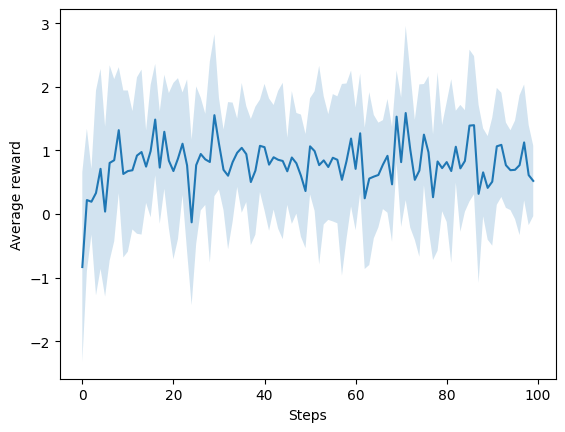

In [18]:
mean_reward = reward_history.mean(axis=0)
reward_std = reward_history.std(axis=0)

# plot the mean reward and a shaded region representing the standard deviation
plt.plot(mean_reward)
plt.fill_between(
    range(n_steps), mean_reward - reward_std, mean_reward + reward_std, alpha=0.2
)
plt.xlabel("Steps")
plt.ylabel("Average reward")

# save the plot
plt.savefig("bandit_reward.png")

/var/folders/1_/xmqxg8cx4_dfzf9vq_761qx00000gn/T/ipykernel_19316/1599952012.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


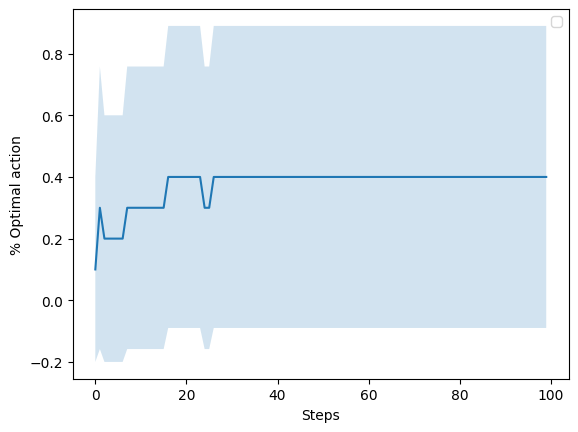

In [19]:
was_optimal_policy_selected = selected_action_history == optimal_action_history.reshape(-1, 1)
optimal_policy_rate = was_optimal_policy_selected.mean(axis=0)
optimal_policy_rate_std = was_optimal_policy_selected.std(axis=0)

# plot the mean reward and a shaded region representing the standard deviation
plt.plot(optimal_policy_rate)
plt.fill_between(
    range(n_steps), 
    optimal_policy_rate - optimal_policy_rate_std, 
    optimal_policy_rate + optimal_policy_rate_std,
    alpha=0.2
)

plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()

# save the plot
plt.savefig("bandit_optimal_action.png")